# Poetry generation challenge

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [1]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.12.0


## Step 1: Create a corpus

In [2]:
##download data from this url
!wget --no-check-certificate \
    https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt \
    -O /tmp/sonnet.txt

--2023-06-05 17:08:12--  https://raw.githubusercontent.com/dswh/lil_nlp_with_tensorflow/main/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29658 (29K) [text/plain]
Saving to: ‘/tmp/sonnet.txt’

/tmp/sonnet.txt     100%[===================>]  28.96K  --.-KB/s    in 0.003s  

2023-06-05 17:08:13 (8.67 MB/s) - ‘/tmp/sonnet.txt’ saved [29658/29658]



In [3]:
##printing the text
shakespeare_text = open('/tmp/sonnet.txt').read()
print(len(shakespeare_text))

28893


In [5]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")

## Set up the tokenizer

In [6]:
##set up tokenizer
tokenizer = Tokenizer()

In [8]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - be mindful of the <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'to': 3, 'thou': 4, 'in': 5, 'my': 6, 'of': 7, 'i': 8, 'thy': 9, 'that': 10, 'with': 11, 'thee': 12, 'for': 13, 'but': 14, 'not': 15, 'a': 16, 'love': 17, 'be': 18, 'all': 19, 'me': 20, 'when': 21, 'so': 22, 'by': 23, 'then': 24, 'is': 25, 'which': 26, 'as': 27, 'this': 28, 'from': 29, 'his': 30, 'self': 31, 'do': 32, 'thine': 33, 'it': 34, 'on': 35, 'art': 36, 'if': 37, 'eyes': 38, 'more': 39, 'or': 40, 'beauty': 41, 'mine': 42, 'doth': 43, 'you': 44, 'your': 45, 'time': 46, 'sweet': 47, 'make': 48, 'one': 49, 'where': 50, 'their': 51, 'fair': 52, 'her': 53, 'are': 54, 'yet': 55, 'day': 56, 'what': 57, 'see': 58, 'who': 59, 'than': 60, 'can': 61, 'should': 62, 'own': 63, 'shall': 64, 'how': 65, 'no': 66, 'hath': 67, 'will': 68, 'were': 69, 'live': 70, 'those': 71, 'him': 72, 'let': 73, 'may': 74, 'o': 75, 'night': 76, "love's": 77, 'now': 78, 'world': 79, 'she': 80, 'nor': 81, 'they': 82, "beauty's": 83, 'dost': 84, 'he': 85, 'give': 86, 'eye': 87, 'still': 88, 's

In [9]:
##create sequences of 
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


In [11]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )


In [13]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

## Define the LSTM model

In [14]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

##define the learning rate - step size for optimizer
adam = tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
142/142 [==============================] - 21s 82ms/step - loss: 6.7742 - accuracy: 0.0199
Epoch 2/200
142/142 [==============================] - 3s 19ms/step - loss: 6.3178 - accuracy: 0.0232
Epoch 3/200
142/142 [==============================] - 1s 9ms/step - loss: 6.1910 - accuracy: 0.0192
Epoch 4/200
142/142 [==============================] - 2s 13ms/step - loss: 6.0464 - accuracy: 0.0285
Epoch 5/200
142/142 [==============================] - 1s 8ms/step - loss: 5.8663 - accuracy: 0.0387
Epoch 6/200
142/142 [==============================] - 2s 12ms/step - loss: 5.6608 - accuracy: 0.0413
Epoch 7/200
142/142 [==============================] - 2s 14ms/step - loss: 5.4239 - accuracy: 0.0521
Epoch 8/200
142/142 [==============================] - 1s 11ms/step - loss: 5.1603 - accuracy: 0.0621
Epoch 9/200
142/142 [==============================] - 2s 11ms/step - loss: 4.8846 - accuracy: 0.0769
Epoch 10/200
142/142 [==============================] - 1s 9ms/step - loss: 4.6226 

## Visualise the metrics

In [15]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

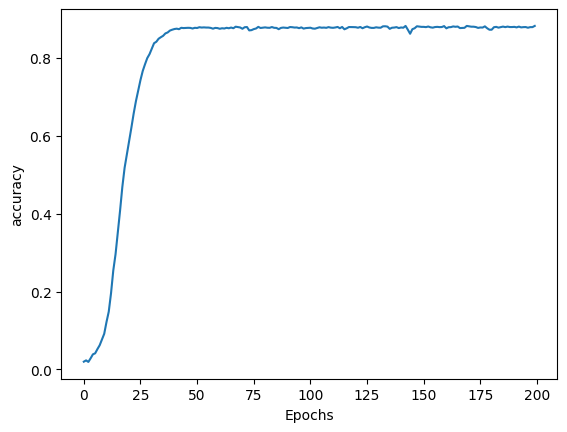

In [16]:
plot_metric(history, 'accuracy')

## Generate new text

In [ ]:
seed_text = "It was a cold night."
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([____], maxlen=max_seq_len-1, padding='pre')
	predicted = model.____(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


It was a cold night. to see his skill are me like done hence ' me done thee hence women's me done me praise thee wherever hence usury remain praise me done me me praise thee cross hence done cruel me thereby behold me praise me praise me thee hence knows me old hymns me dearly me praise me me done which done me dearly done distillation hence hence subject me it replete me old nine which doting old time golden asked lusty with kings me it me yourself nature's kings fill'd times give didst hear'st losses me praise me me old private praise me
